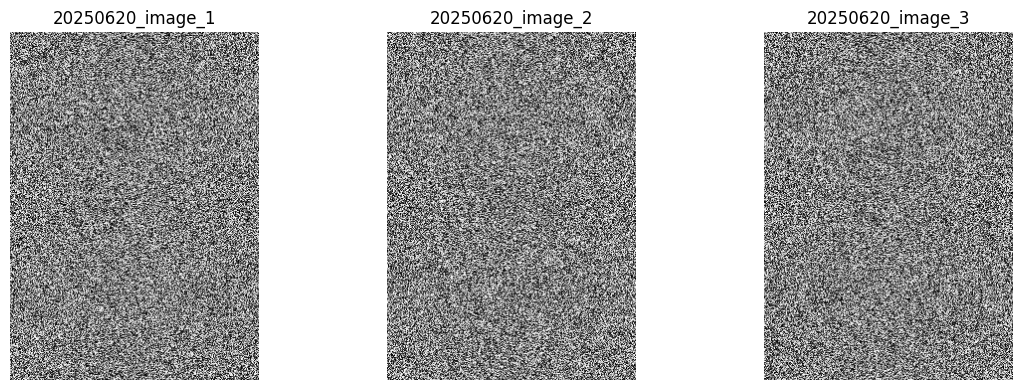

In [1]:
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import matplotlib.pyplot as plt
import numpy as np
import os

# 📁 Prefix to use for all files
prefix = "20250620_"

# 🖼️ Generate and save 3 grayscale images
image_list = []
for i in range(3):
    # Create a grayscale image with numpy (random noise)
    img_array = np.random.randint(0, 255, (350, 250), dtype=np.uint8)
    
    # Convert the array to an image
    img = Image.fromarray(img_array, mode='L')
    
    # Define filename with prefix
    filename = f"{prefix}image_{i+1}.png"
    
    # Save image locally
    img.save(filename)
    
    # Append filename to list
    image_list.append(filename)

# 🗂️ Convert the saved images into a single PDF
pdf_filename = f"{prefix}combined_output.pdf"
c = canvas.Canvas(pdf_filename, pagesize=A4)

# Set page size for A4 paper (595x842 points)
width, height = A4

for image_path in image_list:
    # Open the image
    img = Image.open(image_path)
    
    # Resize to fit A4 while maintaining aspect ratio
    img.thumbnail((width, height))
    
    # Save resized version temporarily to get dimensions
    temp_path = f"{prefix}temp_{os.path.basename(image_path)}"
    img.save(temp_path)
    
    # Read dimensions of resized image
    img_width, img_height = img.size
    
    # Calculate position to center the image
    x = (width - img_width) / 2
    y = (height - img_height) / 2
    
    # Draw the image onto the PDF canvas
    c.drawImage(temp_path, x, y, width=img_width, height=img_height)
    
    # Add a new page
    c.showPage()
    
    # Clean up temporary image
    os.remove(temp_path)

# Save the final PDF
c.save()

# 📊 Optional: Display a preview of the images that were added to the PDF
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, path in enumerate(image_list):
    img = Image.open(path)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f"{prefix}image_{i+1}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()

# 🧹 Optional: Clean up the original image files if not needed
# for path in image_list:
#     os.remove(path)
